**This notebook tracks the spread of the new coronavirus, also known as SARS-CoV-2. It makes the visualization and estimation of this data. This notebook will inform us about the progress of the case and deaths.**

In [1]:
import os
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #visualization

In [2]:
# Read dataset
dataset = pd.read_csv("train.csv")

In [3]:
dataset.head()

,Id,Province_State,Country_Region,Date,ConfirmedCases,Fatalities
0,1,NaN,Afghanistan,2020-01-22,0.0,0.0
1,2,NaN,Afghanistan,2020-01-23,0.0,0.0
2,3,NaN,Afghanistan,2020-01-24,0.0,0.0
3,4,NaN,Afghanistan,2020-01-25,0.0,0.0
4,5,NaN,Afghanistan,2020-01-26,0.0,0.0


In [4]:
# You can change the country variable to your prefer
print(dataset['Country_Region'].unique())
country = 'Turkey'

['Afghanistan' 'Albania' 'Algeria' 'Andorra' 'Angola'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Australia' 'Austria'
 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus'
 'Belgium' 'Belize' 'Benin' 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina'
 'Botswana' 'Brazil' 'Brunei' 'Bulgaria' 'Burkina Faso' 'Burma' 'Burundi'
 'Cabo Verde' 'Cambodia' 'Cameroon' 'Canada' 'Central African Republic'
 'Chad' 'Chile' 'China' 'Colombia' 'Congo (Brazzaville)'
 'Congo (Kinshasa)' 'Costa Rica' "Cote d'Ivoire" 'Croatia' 'Cuba' 'Cyprus'
 'Czechia' 'Denmark' 'Diamond Princess' 'Djibouti' 'Dominica'
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Equatorial Guinea'
 'Eritrea' 'Estonia' 'Eswatini' 'Ethiopia' 'Fiji' 'Finland' 'France'
 'Gabon' 'Gambia' 'Georgia' 'Germany' 'Ghana' 'Greece' 'Grenada'
 'Guatemala' 'Guinea' 'Guinea-Bissau' 'Guyana' 'Haiti' 'Holy See'
 'Honduras' 'Hungary' 'Iceland' 'India' 'Indonesia' 'Iran' 'Iraq'
 'Ireland' 'Israel' 'Italy' 'Jamaica' 'Japan' 'Jordan' 'Kaz

In [5]:
# Country's data was taken since the first case
country_cases = dataset[dataset.Country_Region == country]
df =  country_cases[country_cases.ConfirmedCases != 0.0]
print(df)

          Id Province_State Country_Region        Date  ConfirmedCases  \
17605  24767            NaN         Turkey  2020-03-11             1.0   
17606  24768            NaN         Turkey  2020-03-12             1.0   
17607  24769            NaN         Turkey  2020-03-13             5.0   
17608  24770            NaN         Turkey  2020-03-14             5.0   
17609  24771            NaN         Turkey  2020-03-15             6.0   
17610  24772            NaN         Turkey  2020-03-16            18.0   
17611  24773            NaN         Turkey  2020-03-17            47.0   
17612  24774            NaN         Turkey  2020-03-18            98.0   
17613  24775            NaN         Turkey  2020-03-19           192.0   
17614  24776            NaN         Turkey  2020-03-20           359.0   
17615  24777            NaN         Turkey  2020-03-21           670.0   
17616  24778            NaN         Turkey  2020-03-22          1236.0   
17617  24779            NaN         Tu

**We will write information about dataset for columns and datas
Describe: mean, min, max values
and we'll calculate total days, cases and deaths**

In [6]:
print(df.info())
print(df.describe())
total_days = max(df.Id) - min(df.Id) + 1 
total_cases = max(df.ConfirmedCases)
total_deaths = max(df.Fatalities)
print("Number of days since the first case:", total_days)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27 entries, 17605 to 17631
Data columns (total 6 columns):
Id                27 non-null int64
Province_State    0 non-null object
Country_Region    27 non-null object
Date              27 non-null object
ConfirmedCases    27 non-null float64
Fatalities        27 non-null float64
dtypes: float64(2), int64(1), object(3)
memory usage: 1.5+ KB
None
                 Id  ConfirmedCases  Fatalities
count     27.000000       27.000000   27.000000
mean   24780.000000     7212.259259  139.185185
std        7.937254     9458.795181  194.880444
min    24767.000000        1.000000    0.000000
25%    24773.500000       72.500000    1.000000
50%    24780.000000     1872.000000   44.000000
75%    24786.500000    12179.000000  191.000000
max    24793.000000    30217.000000  649.000000
Number of days since the first case: 27


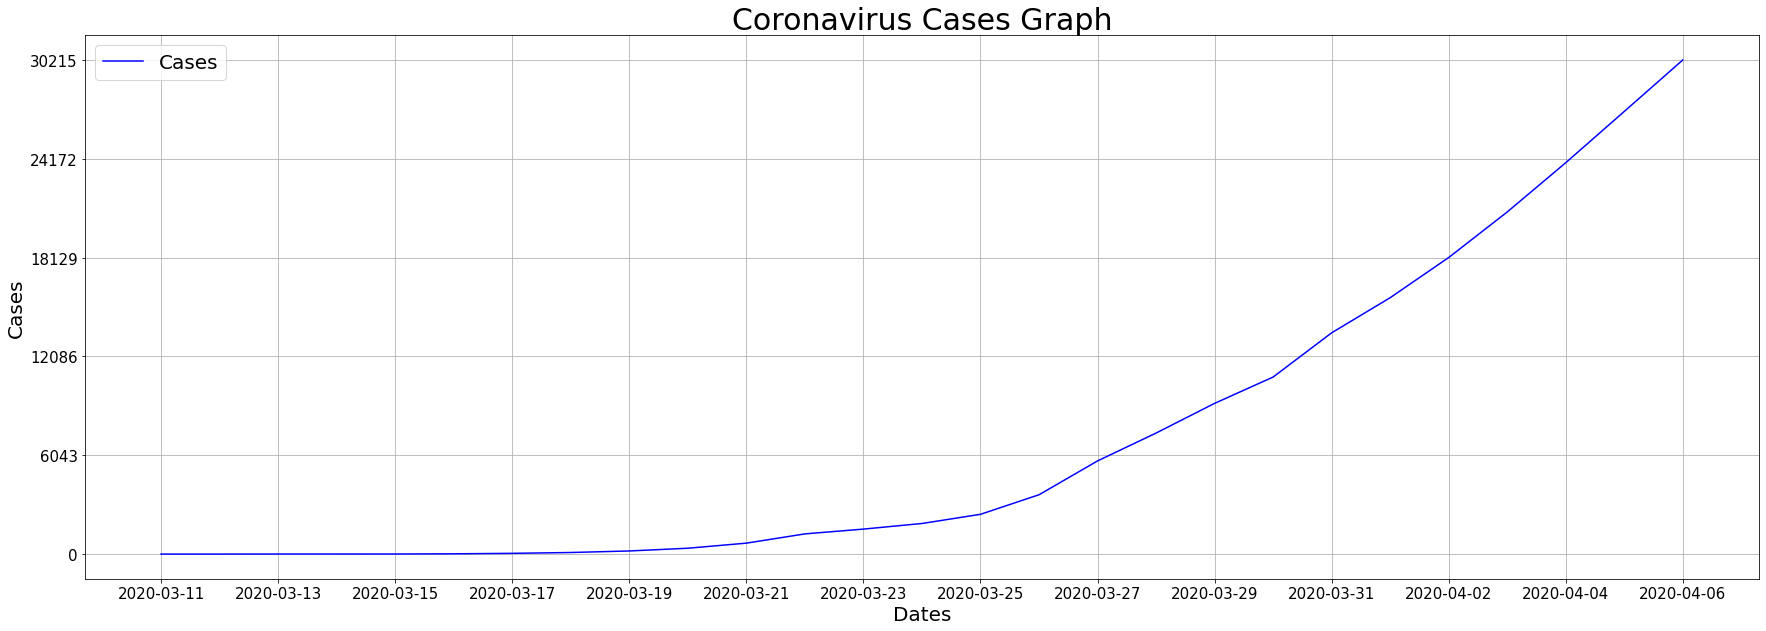

In [7]:
plt.figure(figsize=(30,10))    
plt.plot(df.Date, df.ConfirmedCases, color = 'blue', label = 'Cases')
plt.title('Coronavirus Cases Graph', fontsize=30)
plt.legend(frameon=True, fontsize=20)
plt.xticks(np.arange(0, total_days, int(total_days/10)), fontsize = 15) #xlabel data freq
plt.yticks(np.arange(0, total_cases, int(total_cases/5)), fontsize = 15) #ylabel data freq
plt.xlabel('Dates', fontsize=20)
plt.ylabel('Cases', fontsize=20)
plt.grid(True)
plt.show()

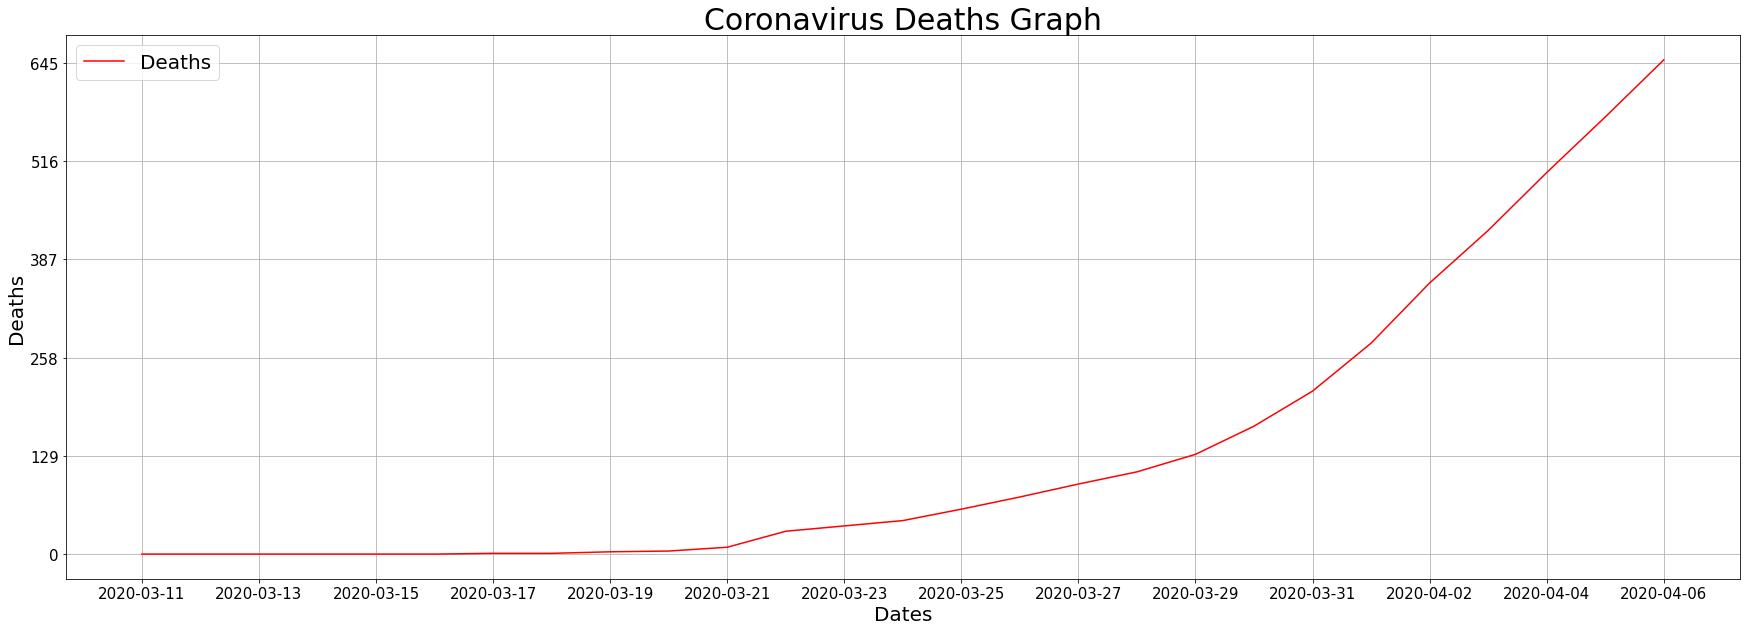

In [8]:
plt.figure(figsize=(30,10)) 
plt.plot(df.Date ,df.Fatalities, color = 'red', label = 'Deaths')
plt.title('Coronavirus Deaths Graph', fontsize=30)
plt.legend(frameon=True, fontsize=20)
plt.xticks(np.arange(0, total_days, int(total_days/10)), fontsize = 15) 
plt.yticks(np.arange(0, total_deaths, int(total_deaths/5)),fontsize = 15) 
plt.xlabel('Dates', fontsize=20)
plt.ylabel('Deaths', fontsize=20)
plt.grid(True)
plt.show()

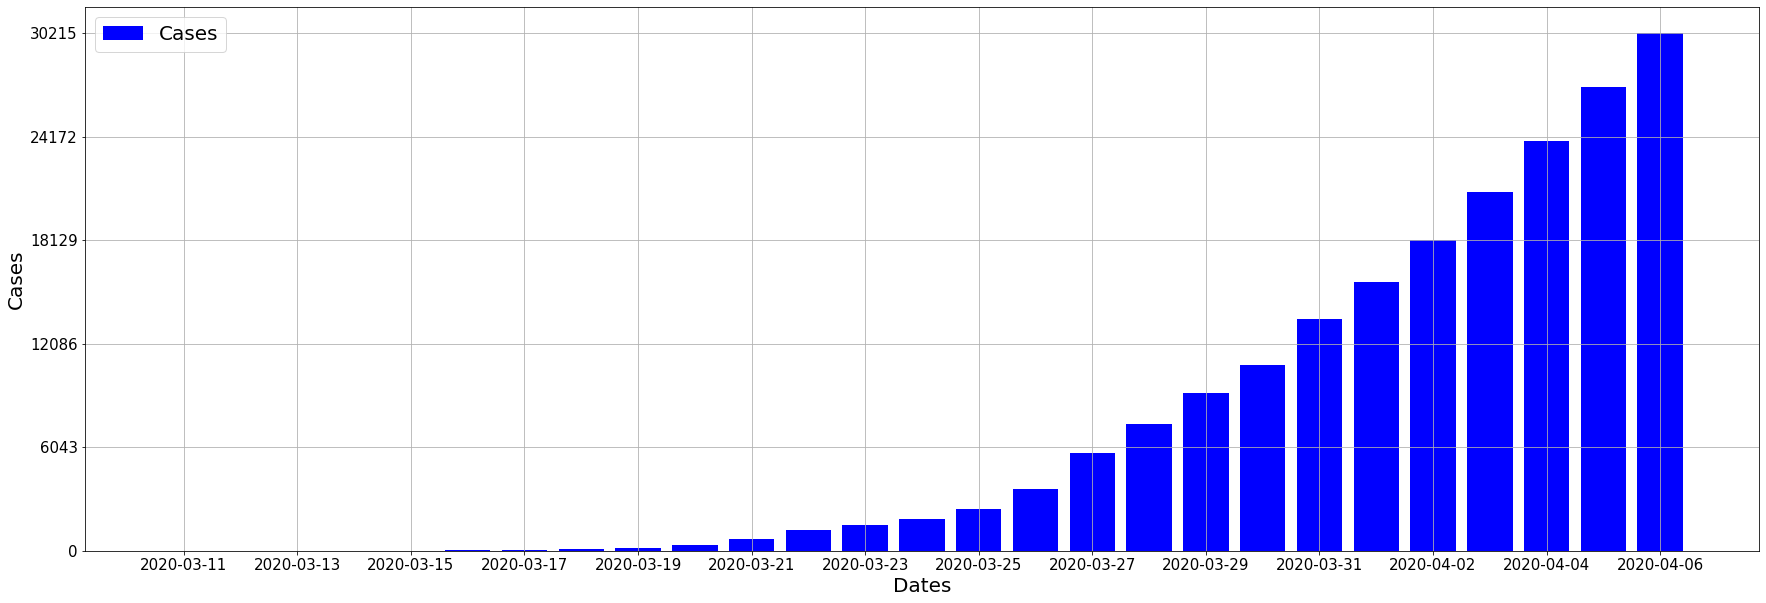

In [9]:
plt.figure(figsize=(30,10))
plt.bar(df.Date, df.ConfirmedCases, color = 'blue', label = 'Cases')
plt.xticks(np.arange(0, total_days, int(total_days/10)),fontsize = 15)
plt.yticks(np.arange(0, total_cases, int(total_cases/5)), fontsize = 15)
plt.xlabel('Dates', fontsize=20)
plt.ylabel('Cases',fontsize=20)
plt.legend(frameon=True, fontsize=20)
plt.grid(True)
plt.show()

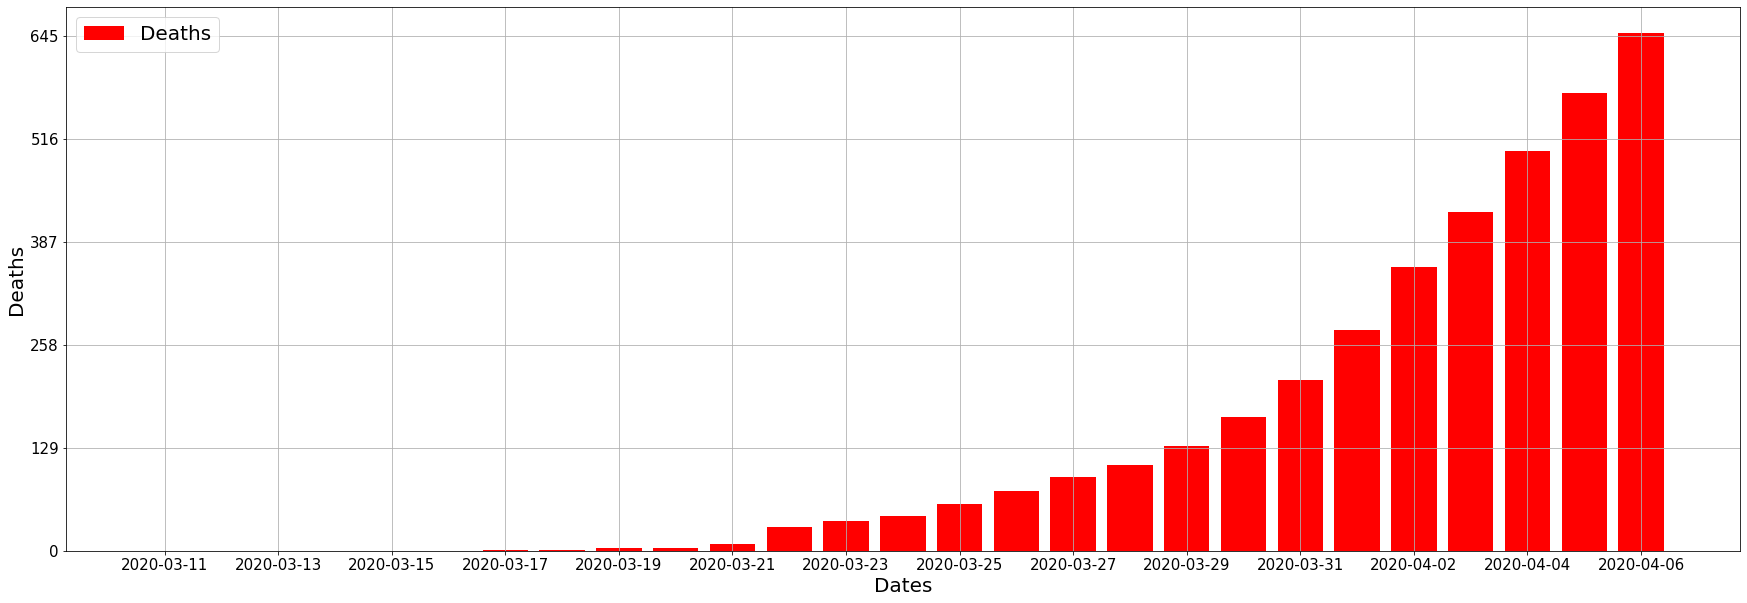

In [10]:
plt.figure(figsize=(30,10))
plt.bar(df.Date, df.Fatalities, color = 'red', label = 'Deaths')
plt.xticks(np.arange(0, total_days, int(total_days/10)),fontsize = 15)
plt.yticks(np.arange(0, total_deaths, int(total_deaths/5)),fontsize = 15)
plt.xlabel('Dates', fontsize=20)
plt.ylabel('Deaths',fontsize=20)
plt.legend(frameon=True, fontsize=20)
plt.grid(True)
plt.show()

# **Linear and Polynomial Regression for one country**

**Now we will predict what the numbers of cases and deaths will be in the following periods**

In [11]:
days_array = np.arange(1,total_days+1).reshape(total_days,1)
case_array = np.array(df.ConfirmedCases).reshape(total_days,1)
death_array = np.array(df.Fatalities).reshape(total_days,1)
print(days_array.shape)
print(case_array.shape)
print(death_array.shape)
# Now we got same shapes for models

(27, 1)
(27, 1)
(27, 1)


In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
case_poly_reg = PolynomialFeatures(degree = 4)
X_poly = case_poly_reg.fit_transform(days_array) # X axis
case_poly_reg.fit(X_poly, case_array) # model fit to predict y axis
case_lin_reg = LinearRegression()
case_lin_reg.fit(X_poly, case_array)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

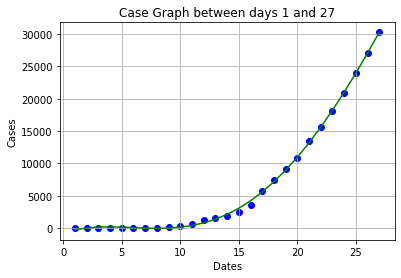

In [13]:
plt.scatter(days_array, case_array, color = 'blue')
plt.plot(days_array, case_lin_reg.predict(case_poly_reg.fit_transform(days_array)), color = 'green')
plt.title('Case Graph between days 1 and '+ str(total_days))
plt.xlabel('Dates')
plt.ylabel('Cases')
plt.grid(True)
plt.show()
# Dots are accurate datas
# Line is predict datas

In [14]:
death_poly_reg = PolynomialFeatures(degree = 4)
X_poly = death_poly_reg.fit_transform(days_array) # X axis
death_poly_reg.fit(X_poly, death_array) # model fit to predict y axis
death_lin_reg = LinearRegression()
death_lin_reg.fit(X_poly, death_array)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

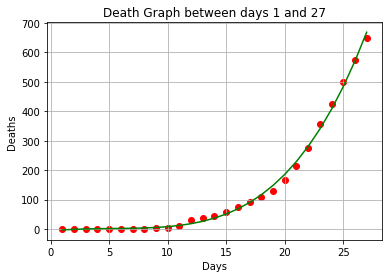

In [15]:
plt.scatter(days_array, death_array, color = 'red')
plt.plot(days_array, death_lin_reg.predict(death_poly_reg.fit_transform(days_array)), color = 'green')
plt.title('Death Graph between days 1 and '+ str(total_days) )
plt.xlabel('Days')
plt.ylabel('Deaths')
plt.grid(True)
plt.show()
# Dots are accurate datas
# Line is predict datas

* Now we can predict total cases and deaths for next day
* These datas are only estimates datas.
* If you try to predict next days's datas, you can get a high fault margin.

In [16]:
total_cases = max(df.ConfirmedCases)
total_deaths = max(df.Fatalities)
pred_now_cases = int(case_lin_reg.predict(case_poly_reg.fit_transform([[total_days]])))
pred_now_deaths = int(death_lin_reg.predict(death_poly_reg.fit_transform([[total_days]])))
fault_margin_cases = int(pred_now_cases - total_cases)
fault_margin_deaths = int(pred_now_deaths - total_deaths)
print("Predict Today Cases and Deaths: ", pred_now_cases, " ", pred_now_deaths)
print("Fault Margin for Cases and Deaths: ", fault_margin_cases, " ", fault_margin_deaths)

Predict Today Cases and Deaths:  30254   668
Fault Margin for Cases and Deaths:  37   19


In [17]:
# Predict cases and deaths for next day
pred_nextday_cases = int(case_lin_reg.predict(case_poly_reg.fit_transform([[total_days+1]])))
pred_nextday_deaths = int(death_lin_reg.predict(death_poly_reg.fit_transform([[total_days+1]])))
print("Predict Next Day Cases and Deaths")
print("Cases: ", pred_nextday_cases , " Deaths: ", pred_nextday_deaths)

Predict Next Day Cases and Deaths
Cases:  33561  Deaths:  778
